EDA and audio processing. View at [nbviewer](https://nbviewer.jupyter.org/github/saty101/Speech-Enhancement/blob/main/notebooks/EDA%20on%20Librispeech.ipynb) as github doesn't render chart studio plots

In [11]:
!pip install chart_studio


     |████████████████████████████████| 64 kB 423 kB/s eta 0:00:01


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import datetime as dt
from datetime import datetime

import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme="pearl")

plt.style.use("fivethirtyeight")
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [103]:
libridf = pd.read_csv("../input/libri-dataset-train-100/LibriSpeech/SPEAKERS.TXT", sep = "|", skiprows=11, error_bad_lines=False)

b'Skipping line 45: expected 5 fields, saw 7\n'


In [104]:
libridf.rename(columns={";ID  ":";ID"},inplace=True)
libridf.head()

,;ID,SEX,SUBSET,MINUTES,NAME
0,14,F,train-clean-360,25.03,Kristin LeMoine
1,16,F,train-clean-360,25.11,Alys AtteWater
2,17,M,train-clean-360,25.04,Gord Mackenzie
3,19,F,train-clean-100,25.19,Kara Shallenberg
4,20,F,train-other-500,30.07,Gesine


Displaying the minutes of each audio sample

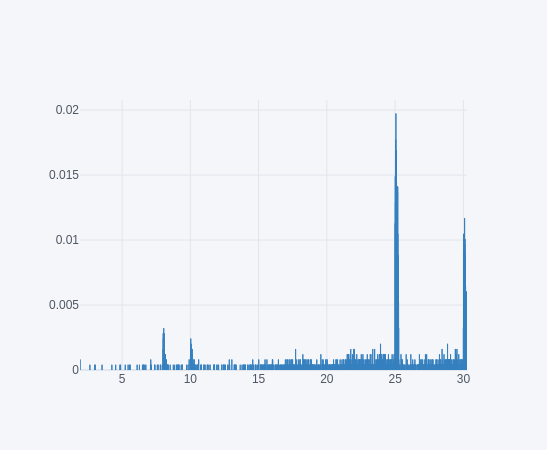

In [111]:
libridf["MINUTES"].value_counts("MINUTES").iplot(kind="bar", color="#3780BF")

In [113]:
# libridf[";ID"].value_counts()
# libridf.iloc[1]
libridf.columns
# libridf[";"]

Index([';ID', 'SEX', ' SUBSET           ', 'MINUTES', ' NAME'], dtype='object')

In [114]:
libridf3 = pd.read_csv("../input/libri-dataset-train-100/LibriSpeech/CHAPTERS.TXT", skiprows=13,sep="|", error_bad_lines=False, warn_bad_lines=False)

In [115]:
libridf3.head()

,;ID,READER,MINUTES,SUBSET,PROJ.,BOOK ID,CH. TITLE,PROJECT TITLE
0,1,110,19.77,train-other-500,53,1023,In Chancery,Bleak House
1,2,110,10.30,train-other-500,53,1023,In Fashion,Bleak House
2,159,4174,7.67,train-other-500,68,2184,Letter XXV,Unbeaten Tracks in Japan
3,198,19,8.42,train-clean-100,219,121,Chapter 01,Northanger Abbey
4,199,98,11.68,train-clean-360,219,121,Chapter 02,Northanger Abbey


In [116]:
libridf3.rename(columns={";ID    ":";ID"}, inplace=True)
libridf3.rename(columns={" SUBSET           ":"SUBSET"}, inplace=True)

In [118]:
libridf = libridf3

In [119]:
libridf.columns

Index([';ID', 'READER', 'MINUTES', 'SUBSET', ' PROJ.', 'BOOK ID',
       ' CH. TITLE ', ' PROJECT TITLE'],
      dtype='object')

In [120]:
libridf[" CH. TITLE "].value_counts()

 Chapter 12                        20
 Chapter 10                        20
 Chapter 20                        19
 Chapter 07                        18
 Chapter 11                        17
                                   ..
 Bk 08 Ch 03: Mother Innocente      1
 09 - Book 2, Ch 01-03              1
 Verses 1-19                        1
 Book 2 Chapter 23                  1
 07 - A Great Storm in Utah         1
Name:  CH. TITLE , Length: 5072, dtype: int64

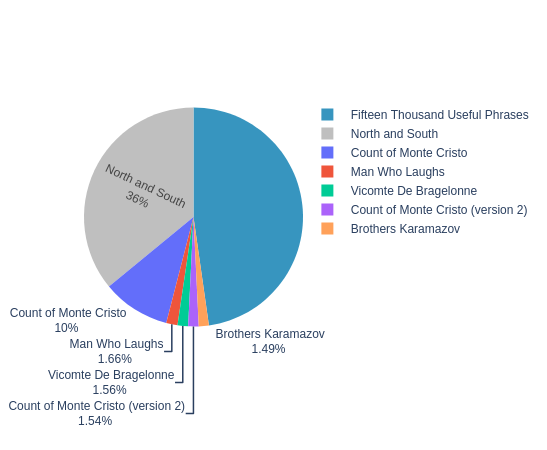

In [121]:
labels = libridf[' PROJECT TITLE'].value_counts().index
values = libridf['SUBSET'].value_counts().values
colors=['#3795bf','#bfbfbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

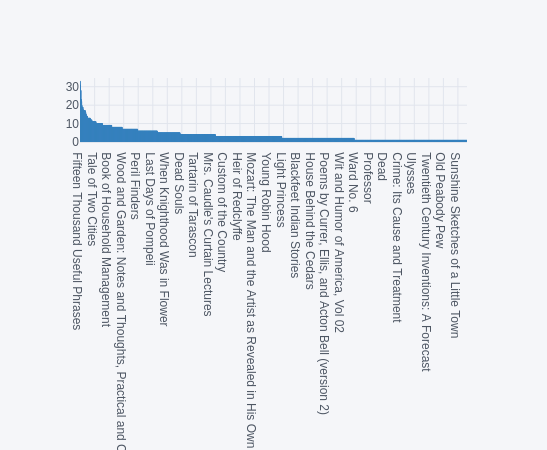

In [122]:
libridf[" PROJECT TITLE"].value_counts().iplot(kind="bar", color="#3780BF")

In [123]:
libridf.head()

,;ID,READER,MINUTES,SUBSET,PROJ.,BOOK ID,CH. TITLE,PROJECT TITLE
0,1,110,19.77,train-other-500,53,1023,In Chancery,Bleak House
1,2,110,10.30,train-other-500,53,1023,In Fashion,Bleak House
2,159,4174,7.67,train-other-500,68,2184,Letter XXV,Unbeaten Tracks in Japan
3,198,19,8.42,train-clean-100,219,121,Chapter 01,Northanger Abbey
4,199,98,11.68,train-clean-360,219,121,Chapter 02,Northanger Abbey


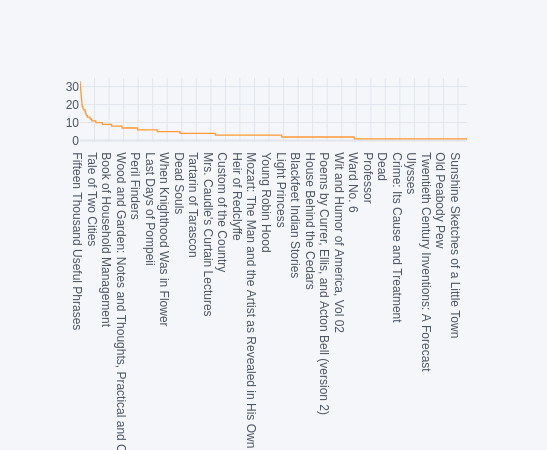

In [126]:
libridf[" PROJECT TITLE"].value_counts().iplot()